## A Classification Project
*By Linh Nguyen*

The report will follow the following sections: 
1. Problem Framing 
2. Data Exploration
3. Data Preprocessing and Model Tuning
4. Results
5. Application to the test dataset

### 1. Problem Framing

In marketing, the churn rate (or customer churn, or customer attrition) describes the proportion of customers, users, players, or subscribers that quit their business/subscription or, more in general, end the relationship with a
company. 

The task is to predict whether or not a customer will churn given a large dataset of a telephone company. The churn dataset is collected in the file "churn_train.csv", which relates the characteristics of telephony account (clients) features, their usage and whether or not the customer churned. In particular, the training dataset consists of 4000 observations, and 20 features. The target is a binary variable, denoting whether the customer
left the company (class 1), or not (class 0). For the phone company, the characteristics of the accounts that churned are of particular interest, in order to prevent more clients from churning in the future. Therefore, for this problem Class 1 is the positive class. 

Thus, this is a **supervised** learning problem, and in particular, it is a **classification** problem where the output is categorical (churn and not churn). We will try to find a way to predict the classes, such that the **AUC score** is maximized. 
AUC - ROC curve is a performance measurement for classification problem at various thresholds settings. The receiver operating characteristic (ROC) is a probability curve and the area under ROC (AUC) represents degree or measure of separability. It tells how much model is capable of distinguishing between classes. The higher the AUC, the better the model is at predicting the right positive and negative class. By analogy, the higher the AUC, the better the model is at distinguishing between customers that churn and not churn.


### 2. Data Exploration

In [1]:
import pandas as pd 
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt 

First, we will load the training dataset into the dataframe `df_churn` and take a look at the first 5 observations.

In [2]:
df_churn = pd.read_csv('churn_train.csv')
df_churn.head()

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,45.0,106,1.0,1395,0.0,0.0,0,235.2,121,39.98,...,87,18.75,236.3,91,10.63,11.8,4.0,3.19,1.0,0
1,44.0,51,0.0,4191,0.0,1.0,0,212.9,80,36.19,...,57,20.07,187.6,99,8.44,8.8,4.0,2.38,2.0,0
2,10.0,64,2.0,4508,0.0,0.0,0,216.9,78,36.87,...,115,17.94,179.8,116,8.09,11.4,5.0,3.08,3.0,0
3,31.0,59,2.0,1041,1.0,1.0,31,225.0,78,38.25,...,79,16.26,226.7,79,10.20,9.1,3.0,2.46,NaN,0
4,8.0,136,1.0,1349,0.0,0.0,0,101.7,105,17.29,...,99,17.24,136.2,119,6.13,9.4,6.0,2.54,3.0,0


Next, we will explore the **data type** of each features.

In [3]:
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 21 columns):
state                            4000 non-null float64
account_length                   4000 non-null int64
area_code                        3811 non-null float64
phone_number                     4000 non-null int64
international_plan               4000 non-null float64
voice_mail_plan                  4000 non-null float64
number_vmail_messages            4000 non-null int64
total_day_minutes                4000 non-null float64
total_day_calls                  4000 non-null int64
total_day_charge                 4000 non-null float64
total_eve_minutes                4000 non-null float64
total_eve_calls                  4000 non-null int64
total_eve_charge                 4000 non-null float64
total_night_minutes              4000 non-null float64
total_night_calls                4000 non-null int64
total_night_charge               4000 non-null float64
total_intl_minutes       

Here we can see that `churn` is a **dichotomous** variable, just like the `international_plan` and `voice_mail_plan`. The `area_code` and `state` are **nominal** variables. Others are **continuous** varivables.

In [4]:
df_churn.describe()

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
count,4000.000000,4000.000000,3811.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,...,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,2924.000000,4000.000000,3661.000000,4000.00000
mean,25.959250,99.809000,0.998163,2506.523000,0.092250,0.264000,7.764250,181.076275,100.070500,30.783495,...,100.151500,17.084080,200.800350,99.987750,9.036140,10.277175,4.448358,2.775382,1.563234,0.14150
std,14.887276,39.897869,0.711913,1440.020472,0.289415,0.440854,13.569164,53.912842,19.684357,9.165125,...,19.770768,4.322081,50.884632,19.818181,2.289808,2.763613,2.438936,0.746127,1.295285,0.34858
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.600000,30.000000,1.120000,...,12.000000,2.650000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,13.000000,73.000000,0.000000,1269.750000,0.000000,0.000000,0.000000,144.100000,87.000000,24.500000,...,87.000000,14.107500,167.300000,87.000000,7.530000,8.500000,3.000000,2.300000,1.000000,0.00000
50%,26.000000,99.000000,1.000000,2516.000000,0.000000,0.000000,0.000000,180.650000,100.000000,30.710000,...,100.000000,17.125000,201.400000,100.000000,9.060000,10.300000,4.000000,2.780000,1.000000,0.00000
75%,39.000000,127.000000,2.000000,3734.250000,0.000000,1.000000,17.000000,217.500000,113.000000,36.980000,...,113.250000,19.960000,235.325000,113.000000,10.590000,12.000000,6.000000,3.240000,2.000000,0.00000
max,50.000000,243.000000,2.000000,4999.000000,1.000000,1.000000,52.000000,351.500000,165.000000,59.760000,...,168.000000,30.910000,381.600000,175.000000,17.170000,20.000000,19.000000,5.400000,9.000000,1.00000


In [5]:
df_churn.shape

(4000, 21)

As visible above, the dataset contains 4000 rows and 21 columns. The variables `area_code`, `total_intl_calls` and `number_customer_service_calls` contain NaN values.

There is one **ID feature** `phone_number` present in the data, which we will remove in the prepocessing part.

Then, we will investigate the customers who churned and not churned.

First we check if all the phone numbers are unique. Then we also check how many rows have NaN values.

In [6]:
len(df_churn['phone_number']), len(df_churn['phone_number'].unique())

(4000, 4000)

In [7]:
sum(df_churn.isnull().sum())

1604

We then take a look at how many people left the company and at how many people stayed.

In [8]:
# I counted the number of clients that churned or did not churn
num_churn = df_churn['churn'][df_churn['churn'] == 1].count()
num_non_churn = df_churn['churn'][df_churn['churn'] == 0].count()

print(num_churn, 'people left the company, and' ,num_non_churn, 'stayed with the company')

566 people left the company, and 3434 stayed with the company


Here two dataframes are made, one with the customers that churned and one with the customers that did not churn. This should make it easier to find differences in the statistics.

In [9]:
# separate the customers who churned / not churned
df_did_churn = df_churn[df_churn['churn'] == 1]
df_not_churn = df_churn[df_churn['churn'] == 0]

Then we compared the means.

In [10]:
# people who did churn
df_did_churn.describe().transpose()['mean']

state                              26.139576
account_length                    102.650177
area_code                           1.022599
phone_number                     2567.784452
international_plan                  0.277385
voice_mail_plan                     0.136042
number_vmail_messages               4.102473
total_day_minutes                 211.333569
total_day_calls                   101.448763
total_day_charge                   35.927067
total_eve_minutes                 213.477562
total_eve_calls                    99.902827
total_eve_charge                   18.145724
total_night_minutes               206.833922
total_night_calls                  99.950530
total_night_charge                  9.307633
total_intl_minutes                 10.824028
total_intl_calls                    4.056235
total_intl_charge                   2.923039
number_customer_service_calls       2.230315
churn                               1.000000
Name: mean, dtype: float64

In [11]:
# people who did not churn
df_not_churn.describe().transpose()['mean']

state                              25.929528
account_length                     99.340711
area_code                           0.994207
phone_number                     2496.425743
international_plan                  0.061736
voice_mail_plan                     0.285090
number_vmail_messages               8.367793
total_day_minutes                 176.089196
total_day_calls                    99.843331
total_day_charge                   29.935719
total_eve_minutes                 198.928072
total_eve_calls                   100.192487
total_eve_charge                   16.909097
total_night_minutes               199.805882
total_night_calls                  99.993885
total_night_charge                  8.991392
total_intl_minutes                 10.187041
total_intl_calls                    4.512127
total_intl_charge                   2.751045
number_customer_service_calls       1.455756
churn                               0.000000
Name: mean, dtype: float64

Comparing the means, there are no differences that are immediately visible.

We then take a look at the **correlation matrix**.

In [12]:
df_churn.corr()['churn']

state                            0.004918
account_length                   0.028914
area_code                        0.013812
phone_number                     0.017274
international_plan               0.259735
voice_mail_plan                 -0.117851
number_vmail_messages           -0.109572
total_day_minutes                0.227877
total_day_calls                  0.028430
total_day_charge                 0.227871
total_eve_minutes                0.099741
total_eve_calls                 -0.005107
total_eve_charge                 0.099735
total_night_minutes              0.048145
total_night_calls               -0.000763
total_night_charge               0.048142
total_intl_minutes               0.080344
total_intl_calls                -0.064847
total_intl_charge                0.080353
number_customer_service_calls    0.206749
churn                            1.000000
Name: churn, dtype: float64

Columns with an (-) 0.1 or 0.2 correlation with `churn` are the **highest correlated** features:
`international_plan`,
`voicemail_plan`, 
`number_vmail_messages`, 
`total_day_minutes`, 
`total_day_calls`, 
`total_day_charge`, `number_customer_service_calls`,
and `total_eve_minutes` and `total_eve_charge` with 0.099

In [13]:
df_churn.corr().style.background_gradient(cmap='Blues')

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
state,1,0.0035132,-0.00170214,0.0175637,0.0114937,-0.0187827,-0.0159358,0.0161548,-0.0152535,0.0161564,0.010843,-0.0187278,0.0108412,0.0109003,0.0115039,0.0109001,-0.0101673,0.0157362,-0.0101792,-0.0214711,0.00491819
account_length,0.0035132,1,-0.0340247,0.0100007,0.0192409,-0.00611757,-0.0125858,0.0163497,0.0141466,0.0163434,-0.0161127,0.00464065,-0.016107,0.00427189,-0.00216392,0.00426956,0.00491352,0.00364585,0.00492728,0.00282563,0.0289142
area_code,-0.00170214,-0.0340247,1,-0.0225862,0.0379766,0.0191169,0.0180882,0.00667993,0.008887,0.0066837,0.0138617,-0.00576077,0.0138791,0.0246464,0.0220504,0.0246227,0.00717091,-0.00213785,0.00709292,0.00396964,0.0138122
phone_number,0.0175637,0.0100007,-0.0225862,1,0.0284147,0.0178537,0.0180457,-0.00384898,-0.00882726,-0.00385112,-0.0157532,0.0194869,-0.0157392,0.0102692,0.00868387,0.0102687,-0.00251956,-0.024024,-0.00248095,0.019397,0.0172735
international_plan,0.0114937,0.0192409,0.0379766,0.0284147,1,0.00898416,0.00821366,0.0336755,0.0143966,0.0336774,0.0151955,0.00170861,0.0151941,-0.0350883,0.0126224,-0.0351058,0.0370866,-0.0153199,0.0370379,-0.00987756,0.259735
voice_mail_plan,-0.0187827,-0.00611757,0.0191169,0.0178537,0.00898416,1,0.955515,0.0116758,0.00474171,0.0116716,0.0136184,0.00410312,0.0136135,0.0195158,0.0011144,0.0195141,-0.00135397,-0.0112623,-0.00128776,-0.00801912,-0.117851
number_vmail_messages,-0.0159358,-0.0125858,0.0180882,0.0180457,0.00821366,0.955515,1,0.0179257,0.00638542,0.0179216,0.010221,0.00718839,0.01022,0.0185821,-0.00199327,0.0185753,-0.00330833,-0.00343552,-0.00325003,-0.00612522,-0.109572
total_day_minutes,0.0161548,0.0163497,0.00667993,-0.00384898,0.0336755,0.0116758,0.0179257,1,-0.00843661,1,0.00344072,0.00135337,0.00342444,0.0160982,0.0130527,0.0160795,-0.0203823,-0.00818715,-0.0203209,0.0145428,0.227877
total_day_calls,-0.0152535,0.0141466,0.008887,-0.00882726,0.0143966,0.00474171,0.00638542,-0.00843661,1,-0.00843874,0.0052561,0.010696,0.00527122,0.00338373,-0.0152743,0.00339048,0.00956553,0.00531151,0.00960972,-0.0146935,0.0284298
total_day_charge,0.0161564,0.0163434,0.0066837,-0.00385112,0.0336774,0.0116716,0.0179216,1,-0.00843874,1,0.00344334,0.00135436,0.00342706,0.0161032,0.0130544,0.0160845,-0.0203875,-0.00819522,-0.0203261,0.0145349,0.227871


We then made a few density plots for the high correlated features.

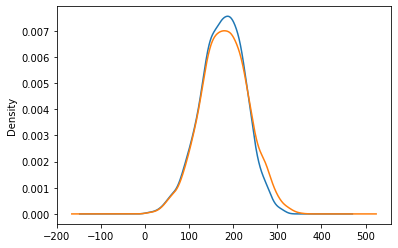

In [14]:
# density of total day minutes
df_not_churn['total_day_minutes'].plot(kind='density')
df_churn['total_day_minutes'].plot(kind='density');

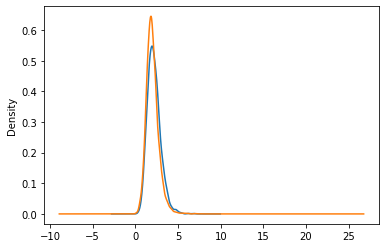

In [15]:
# density plot call length
call_length_churn_day = df_did_churn['total_day_minutes'] / df_did_churn['total_day_calls']
call_length_churn_eve = df_did_churn['total_eve_minutes'] / df_did_churn['total_eve_calls']
call_length_churn_night = df_did_churn['total_night_minutes'] / df_did_churn['total_night_calls']

call_length_no_churn_day = df_not_churn['total_day_minutes'] / df_not_churn['total_day_calls']
call_length_no_churn_eve = df_not_churn['total_eve_minutes'] / df_not_churn['total_eve_calls']
call_length_no_churn_night = df_not_churn['total_night_minutes'] / df_not_churn['total_eve_calls']

call_length_churn = pd.concat([call_length_churn_day, call_length_churn_eve, call_length_churn_night])
call_length_no_churn = pd.concat([call_length_no_churn_day, call_length_no_churn_eve, call_length_no_churn_night])

call_length_churn.plot(kind='density');
call_length_no_churn.plot(kind='density');

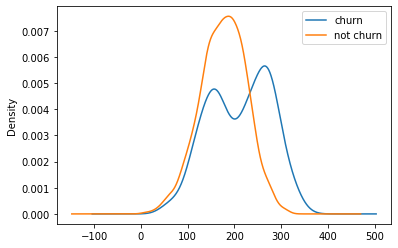

In [16]:
# density plot for total day minutes
tdm = df_did_churn['total_day_minutes'].plot(kind='density')
df_not_churn['total_day_minutes'].plot(kind='density', ax=tdm)
tdm.legend(['churn', 'not churn']);

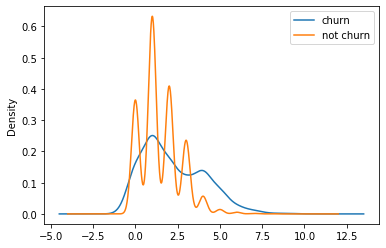

In [17]:
# density plot for number customer service calls
tdm = df_did_churn['number_customer_service_calls'].plot(kind='density')
df_not_churn['number_customer_service_calls'].plot(kind='density', ax=tdm)
tdm.legend(['churn', 'not churn']);

We can see clear differences above. We are aware that the number of customer service calls is an integer. 

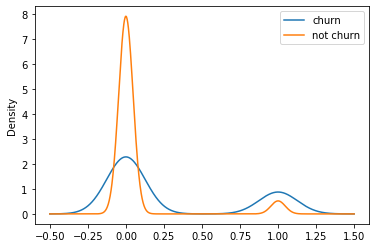

In [18]:
# density plot for international plan
tdm = df_did_churn['international_plan'].plot(kind='density')
df_not_churn['international_plan'].plot(kind='density', ax=tdm)
tdm.legend(['churn', 'not churn']);

The density graphs give us a good first impression and show that there are differences in the behavior of people who churn and people who do not churn.

Thus, we will take a closer look at the number of international plans.

In [19]:
# find how many people had an international plan
churn_int_1 = len(df_did_churn[df_did_churn['international_plan'] == 1])
churn_int_0 = len(df_did_churn[df_did_churn['international_plan'] == 0])
nchurn_int_1 = len(df_not_churn[df_not_churn['international_plan'] == 1])
nchurn_int_0 = len(df_not_churn[df_not_churn['international_plan'] == 0])

churn_int_1, churn_int_0, nchurn_int_1, nchurn_int_0

(157, 409, 212, 3222)

In [20]:
# the percentages of how many of the people that did churn had an international plan
churn_int_1/len(df_did_churn)*100, churn_int_0/len(df_did_churn)*100

(27.73851590106007, 72.26148409893993)

In [21]:
# the percentages of how many of the people that did not churn had an international plan
nchurn_int_1/len(df_not_churn)*100, nchurn_int_0/len(df_not_churn)*100

(6.173558532323821, 93.82644146767618)

Here we can see that from the customers who churned 27.7% had an international plan while from the customers who did not churn only 6.2% had an international plan. 

### 3. Data Preprocessing and Model Tuning

#### a. Data Preprocessing

Since the type of analysis we want to perform is a **supervised** learning task and the output variable is binary (there are two classes: churn/not churn), we will perform **classification**. So first we will separate the input features X (predictors) from the output feature y.

In [22]:
# Data import
df_churn = pd.read_csv("churn_train.csv")
df_test = pd.read_csv("churn_test.csv")

X_train = df_churn.drop('churn', axis=1)
y_train = df_churn['churn']

X_test = df_test.drop('churn', axis=1)
y_test = df_test['churn']

We will plot the correlation matrix of features `X_train`.

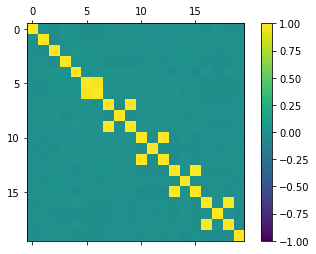

In [23]:
# Correlation matrix of features
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(X_train.corr(), vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,9,1)

Then, we can see below that the class labels are fairly represented both in the training and in the test set but there exists an **imbalance problem**.

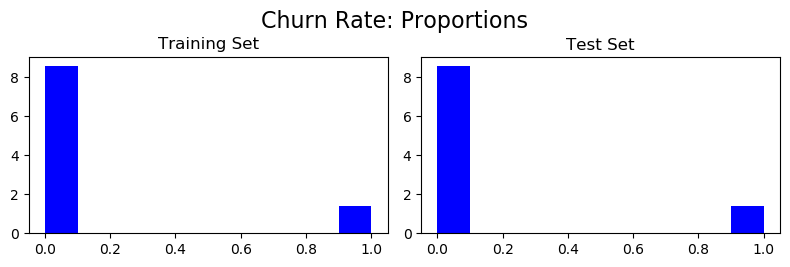

In [24]:
y_train_series = pd.Series(y_train)
y_test_series = pd.Series(y_test)   
fig, axes = plt.subplots(1, 2, figsize=(8,2.5), dpi=100)
axes[0].hist(y_train_series, color='blue', density=True)
axes[0].set_title('Training Set')
axes[1].hist(y_test_series, color='blue', density=True)
axes[1].set_title('Test Set')
plt.suptitle('Churn Rate: Proportions', y=1.05, size=16)
plt.tight_layout();

#### Missing values
As seen in the data exploration, there are three columns with missing values.

In [25]:
X_train.isnull().sum()

state                               0
account_length                      0
area_code                         189
phone_number                        0
international_plan                  0
voice_mail_plan                     0
number_vmail_messages               0
total_day_minutes                   0
total_day_calls                     0
total_day_charge                    0
total_eve_minutes                   0
total_eve_calls                     0
total_eve_charge                    0
total_night_minutes                 0
total_night_calls                   0
total_night_charge                  0
total_intl_minutes                  0
total_intl_calls                 1076
total_intl_charge                   0
number_customer_service_calls     339
dtype: int64

To deal with the missing values, we can **drop the missing observations**. 

In [26]:
X_train.shape

(4000, 20)

In [27]:
X_train_nomissing = X_train.dropna()
X_train_nomissing.shape

(2541, 20)

In [28]:
X_test.shape

(1000, 20)

In [29]:
X_test_nomissing = X_test.dropna()
X_test_nomissing.shape

(664, 20)

As we have seen above, if we drop all the missing values, our dataset will nearly halve. Thus, the fraction of empty entries is large and it could strongly affect and bias the final results.

Therefore, we decide to perform **imputation** for the missing values.
To apply the following data preprocessing techniques, we will need to separate the nominal features from the numeric ones; this is because nominal and numeric features have their own manipulation methods.

In [30]:
print("Number of observed values per feature:")
{x:len(X_train[x].value_counts()) for x in X_train.columns}

Number of observed values per feature:


{'state': 51,
 'account_length': 217,
 'area_code': 3,
 'phone_number': 4000,
 'international_plan': 2,
 'voice_mail_plan': 2,
 'number_vmail_messages': 48,
 'total_day_minutes': 1793,
 'total_day_calls': 121,
 'total_day_charge': 1793,
 'total_eve_minutes': 1738,
 'total_eve_calls': 122,
 'total_eve_charge': 1554,
 'total_night_minutes': 1730,
 'total_night_calls': 129,
 'total_night_charge': 992,
 'total_intl_minutes': 169,
 'total_intl_calls': 20,
 'total_intl_charge': 169,
 'number_customer_service_calls': 10}

As described in the data exploration part, there are two types of data, the **continuous** and the **categorical** (and binary) features. Besides, we do not have to encode the categorical variables since it is already encoded in the dataset.

In [31]:
# Separate continuous from categorical features
X_train_cat = X_train[['state', 'area_code', 'international_plan', 'voice_mail_plan']]
X_train_cont = X_train.drop((col for col in X_train_cat.columns), axis=1)

X_test_cat = X_test[['state', 'area_code', 'international_plan', 'voice_mail_plan']]
X_test_cont = X_test.drop((col for col in X_test_cat.columns), axis=1)

Next, we will **impute the data** using the median for continuous data (since it is not as sensitive to the outliers as the mean) and the mode for the categorical data.

In [32]:
# Data Imputation
from sklearn.impute import SimpleImputer
num_imputer = SimpleImputer(strategy='median')
cat_imputer = SimpleImputer(strategy='most_frequent')
X_train_cont_imp = pd.DataFrame(num_imputer.fit_transform(X_train_cont))
X_train_cat_imp = pd.DataFrame(cat_imputer.fit_transform(X_train_cat))

# Impute the test dataset with the parameters from the training dataset
X_test_cont_imp = pd.DataFrame(num_imputer.transform(X_test_cont))
X_test_cat_imp = pd.DataFrame(cat_imputer.transform(X_test_cat))

# The original sample size is preserved
(X_train_cont_imp.shape, X_train_cat_imp.shape)

((4000, 16), (4000, 4))

We then compare the results for the variable `total_intl_calls`.

In [33]:
pd.DataFrame({"original data":(X_train.iloc[:,17].mean(),
                                           X_train.iloc[:,17].median(),
                                          X_train.iloc[:,17].std()), 
             "dropping missing cases":(X_train_nomissing.iloc[:,17].mean(),
                                           X_train_nomissing.iloc[:,17].median(),
                                          X_train_nomissing.iloc[:,17].std()), 
             "imputed data":(X_train_cont_imp.iloc[:,13].mean(),
                             X_train_cont_imp.iloc[:,13].median(),
                             X_train_cont_imp.iloc[:,13].std())},
              index=["mean", "median", "std.deviation"])

,original data,dropping missing cases,imputed data
mean,4.448358,4.463597,4.327750
median,4.000000,4.000000,4.000000
std.deviation,2.438936,2.448998,2.094619


We will continue the preprocessing steps with the imputed data.

#### Scaling
In raw datasets, numeric features are usually observed under different scales and machine learning algorithms are not aware of these differences, and will most likely end up giving more weights to variables with larger variances.
Scaling transforms the attributes so that the new variables vary within a comparable range of values. Importantly, while the features are re-scaled, their correlation structure is left untouched, so that the information about what attributes are the strongest predictors of the output is not lost.
For that reason, we will scale the continuous variables using **Standardization** to have the same mean and variance.

In [34]:
from sklearn.preprocessing import StandardScaler
standardizer = StandardScaler()
X_train_cont_standardized = pd.DataFrame(standardizer.fit_transform(X_train_cont_imp))
X_test_cont_standardized = pd.DataFrame(standardizer.transform(X_test_cont_imp))

We can see the means and scales used for the standardization of the features

In [35]:
(standardizer.mean_, standardizer.scale_)

(array([9.98090000e+01, 2.50652300e+03, 7.76425000e+00, 1.81076275e+02,
        1.00070500e+02, 3.07834950e+01, 2.00986825e+02, 1.00151500e+02,
        1.70840800e+01, 2.00800350e+02, 9.99877500e+01, 9.03614000e+00,
        1.02771750e+01, 4.32775000e+00, 2.77538250e+00, 1.51550000e+00]),
 array([3.98928818e+01, 1.43984046e+03, 1.35674674e+01, 5.39061026e+01,
        1.96818960e+01, 9.16397906e+00, 5.08419478e+01, 1.97682965e+01,
        4.32154073e+00, 5.08782715e+01, 1.98157034e+01, 2.28952204e+00,
        2.76326736e+00, 2.09435669e+00, 7.46033882e-01, 1.24890342e+00]))

#### Merging the datasets
After preprocessing the nominal and numeric features, we will merge the datasets and update the variable names.

In [36]:
# Merging the datasets
X_train_cont_standardized.index = X_train.index
X_train_cat_imp.index = X_train.index 
X_test_cont_standardized.index = X_test.index
X_test_cat_imp.index = X_test.index
X_train_processed = pd.concat([X_train_cat_imp, X_train_cont_standardized], axis=1)
X_test_processed = pd.concat([X_test_cat_imp, X_test_cont_standardized], axis=1)

# Update variable names 
new_var_names = list(X_train_cat.columns)
new_var_names = new_var_names + list(X_train_cont.columns)
X_train_processed.columns = new_var_names
X_test_processed.columns = new_var_names
X_train_processed.head()

,state,area_code,international_plan,voice_mail_plan,account_length,phone_number,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,45.0,1.0,0.0,0.0,0.155191,-0.771977,-0.572270,1.004037,1.063388,1.003549,0.385768,-0.665282,0.385492,0.697737,-0.453567,0.696154,0.551096,-0.156492,0.555762,-0.412762
1,44.0,0.0,0.0,1.0,-1.223501,1.169905,-0.572270,0.590355,-1.019744,0.589974,0.690634,-2.182864,0.690939,-0.259450,-0.049847,-0.260377,-0.534575,-0.156492,-0.529979,0.387940
2,10.0,2.0,0.0,0.0,-0.897629,1.390069,-0.572270,0.664558,-1.121360,0.664177,0.196947,0.751127,0.198059,-0.412757,0.808059,-0.413248,0.406340,0.320982,0.408316,1.188643
3,31.0,2.0,1.0,1.0,-1.022964,-1.017837,1.712608,0.814819,-1.121360,0.814767,-0.190528,-1.069971,-0.190691,0.509051,-1.059147,0.508342,-0.426008,-0.633966,-0.422746,-0.412762
4,8.0,1.0,0.0,0.0,0.907204,-0.803924,-0.572270,-1.472491,0.250459,-1.472449,0.035663,-0.058250,0.036080,-1.269704,0.959454,-1.269322,-0.317441,0.798455,-0.315512,1.188643


#### Dimensionality Reduction
In our dataset, there are totally 20 features. However, not every feature is informative for the prediction of the class variable (churn/not churn). Thus, it is necessary to remove those features.

##### Uninformative variables

The first uninfomative variable is `phone_number`, which represents **Customer ID**. This can be considered uninformative for the prediction of the class because knowing the Customer ID does not give us any information about the probability of churning. Furthermore, retaining these type of variables in the dataset will produce overfitting models in the training stage. Thus, we can safely remove the `phone_number` variable from our dataset.

In [37]:
X_train_processed.drop(["phone_number"], axis=1, inplace=True)
X_test_processed.drop(["phone_number"], axis=1, inplace=True)
X_train_processed.head()

,state,area_code,international_plan,voice_mail_plan,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,45.0,1.0,0.0,0.0,0.155191,-0.572270,1.004037,1.063388,1.003549,0.385768,-0.665282,0.385492,0.697737,-0.453567,0.696154,0.551096,-0.156492,0.555762,-0.412762
1,44.0,0.0,0.0,1.0,-1.223501,-0.572270,0.590355,-1.019744,0.589974,0.690634,-2.182864,0.690939,-0.259450,-0.049847,-0.260377,-0.534575,-0.156492,-0.529979,0.387940
2,10.0,2.0,0.0,0.0,-0.897629,-0.572270,0.664558,-1.121360,0.664177,0.196947,0.751127,0.198059,-0.412757,0.808059,-0.413248,0.406340,0.320982,0.408316,1.188643
3,31.0,2.0,1.0,1.0,-1.022964,1.712608,0.814819,-1.121360,0.814767,-0.190528,-1.069971,-0.190691,0.509051,-1.059147,0.508342,-0.426008,-0.633966,-0.422746,-0.412762
4,8.0,1.0,0.0,0.0,0.907204,-0.572270,-1.472491,0.250459,-1.472449,0.035663,-0.058250,0.036080,-1.269704,0.959454,-1.269322,-0.317441,0.798455,-0.315512,1.188643


Variables with **(near) zero-variance**, on the other hand, are attributes that are almost constant, or completely constant across examples. As such, they cannot be informative for predictions, and can be safely removed.

In [38]:
from sklearn.feature_selection import VarianceThreshold

zv_features = VarianceThreshold(threshold=0.01)
zv_features.fit(X_train_processed)
{X_train_processed.columns[x]:zv_features.variances_[x].round(3) 
 for x in range(X_train_processed.shape[1])}

{'state': 221.576,
 'area_code': 0.483,
 'international_plan': 0.084,
 'voice_mail_plan': 0.194,
 'account_length': 1.0,
 'number_vmail_messages': 1.0,
 'total_day_minutes': 1.0,
 'total_day_calls': 1.0,
 'total_day_charge': 1.0,
 'total_eve_minutes': 1.0,
 'total_eve_calls': 1.0,
 'total_eve_charge': 1.0,
 'total_night_minutes': 1.0,
 'total_night_calls': 1.0,
 'total_night_charge': 1.0,
 'total_intl_minutes': 1.0,
 'total_intl_calls': 1.0,
 'total_intl_charge': 1.0,
 'number_customer_service_calls': 1.0}

As we see above, when we use a threshold of 0.01, there is no variable to be removed. 

##### Feature Selection

As stated above, not all features are necessarily good predictors of the class/output. Thus, we will perform feature selection to reduce the number of independent variables for training.

**Select K-Best**
The function will then detect the k best features according to some univariate tests.

In [108]:
from sklearn.feature_selection import SelectKBest, f_classif
skb = SelectKBest(score_func= f_classif, k=15)
skb.fit(X_train_processed, y_train)

SelectKBest(k=15, score_func=<function f_classif at 0x00000228BD925378>)

We can see the scores that the model gives to each features.

In [114]:
skb.scores_.round(decimals=1)

array([1.000e-01, 7.000e-01, 2.892e+02, 5.630e+01, 3.300e+00, 4.860e+01,
       2.190e+02, 3.200e+00, 2.190e+02, 4.020e+01, 1.000e-01, 4.020e+01,
       9.300e+00, 0.000e+00, 9.300e+00, 2.600e+01, 1.240e+01, 2.600e+01,
       1.520e+02])

The highest score (289.2) is given to feature `international_plan`.

**SelectFromModel()**
Feed the function with a scikit-learn estimator, using Logistic Regression model with Lasso penalty as a classifier for the importance weights of each feature. 

In [106]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
sel_log_reg = SelectFromModel(estimator=LogisticRegression(penalty='l2', solver='lbfgs'))
sel_log_reg.fit(X_train_processed, y_train)

SelectFromModel(estimator=LogisticRegression(C=1.0, class_weight=None,
                                             dual=False, fit_intercept=True,
                                             intercept_scaling=1, l1_ratio=None,
                                             max_iter=100, multi_class='warn',
                                             n_jobs=None, penalty='l2',
                                             random_state=None, solver='lbfgs',
                                             tol=0.0001, verbose=0,
                                             warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

We can see which features to be retained from the model.

In [107]:
sel_log_reg.get_support()

array([False, False,  True,  True, False, False,  True, False,  True,
       False, False, False, False, False, False, False, False, False,
        True])

According to this model, the retained features are `international_plan`, `voice_mail_plan`, `total_day_minutes`, `total_day_charge` and `number_customer_service_calls`.

**Random Forest**
This is a ensembled learning model, which can take into account non-linearities and potential interactions among features and provide a measure of feature importance after the training stage.

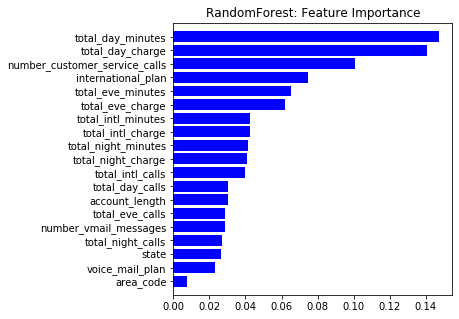

In [42]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
rf.fit(X_train_processed, y_train)
importances = rf.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(5,5))
plt.barh(range(X_train_processed.shape[1]), importances[indices], color='b', align='center')
plt.yticks(range(X_train_processed.shape[1]), [X_train_processed.columns[v] for v in indices])
plt.ylim([-1, X_train_processed.shape[1]])
plt.title("RandomForest: Feature Importance")
plt.show()

We can see that the most important features according to Random Forest are `total_day_minutes` and `total_day_charge` and the least important feature is `area_code`.

Looking at the three feature selection models above, we decide not to remove any features except from the variable `phone_number` we deleted before.

#### b. Candidate models
In this part, we will try as many models from different categories as we can. Then, we can measure and compare their performance and analyze the errors each algorithm makes. Base on the results, we will choose the most promissing models to tune them in the Result part.

**Decision Tree**

First we want to make a decision tree.

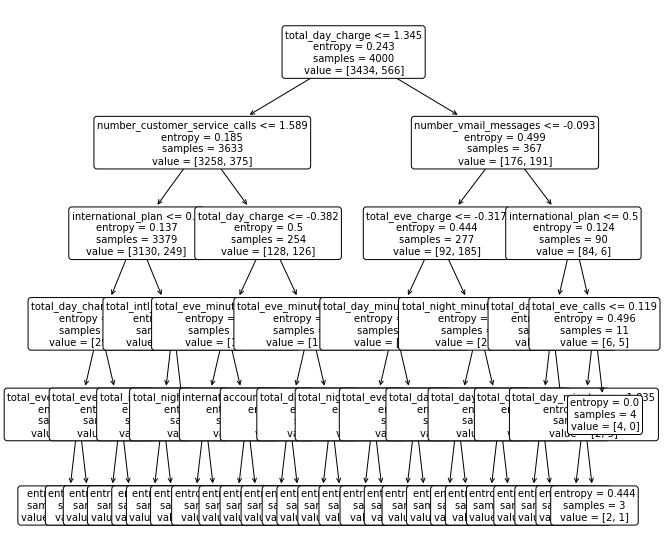

In [80]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

X_train = X_train_processed

tree = DecisionTreeClassifier(max_depth=5, random_state=1)
tree.fit(X_train, y_train)

from sklearn.tree import plot_tree
plt.figure(figsize=(10,10))
plot_tree(tree, feature_names=list(X_train), filled=False, fontsize=10, rounded=True)
plt.show()

Now we take a look at the feature importances.

In [44]:
tree.feature_importances_

array([0.        , 0.        , 0.09772621, 0.        , 0.00270401,
       0.07745574, 0.03154386, 0.00311474, 0.29136595, 0.03514799,
       0.00409698, 0.11804122, 0.02537141, 0.        , 0.00455958,
       0.        , 0.08298381, 0.09293418, 0.13295432])

This graph below shows the feature importances when we chose a tree depth of 5.

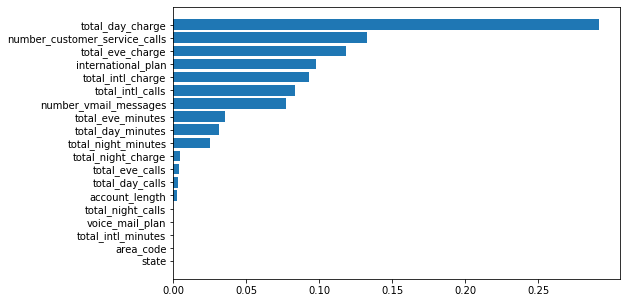

In [138]:
plt.figure(figsize=(8,5))
plt.barh(range(X_train.shape[1]), np.sort(tree.feature_importances_))
plt.xticks(np.arange(tree.feature_importances_.min(), tree.feature_importances_.max(),0.05))
plt.yticks(range(X_train.shape[1]), X_train.columns[np.argsort(tree.feature_importances_)])
plt.show()

From the decision tree, we can see that there are some features that score a 0 for importance, which is not included by the model. These features are `total_inl_charge`, `number_vmail_messages`, `area_code` and `state`. This leaves us with 15 remaining features.

On the other hand, `total_day_charge` is the most important feature to the tree, followed by `number_customer_service_calls` and `international_plan`

Next, we want to plot the ROC curve of the decision tree.

In [46]:
def plot_roc(fpr, tpr, label=None, col='b'):
    plt.plot(fpr, tpr, col, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (1-Specificity)')
    plt.ylabel('True Positive Rate (Sensitivity)')
    plt.xlim((-0.02,1.02))
    plt.ylim((-0.02,1.02))
    plt.title('ROC Curve')

Here you can see the plot from the ROC curve on the training set.

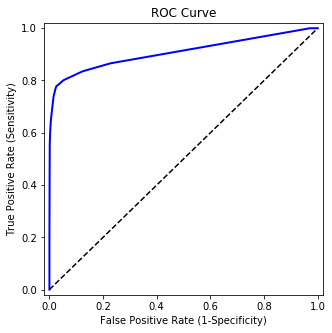

In [47]:
from sklearn import metrics
from sklearn.metrics import roc_curve

pred_probs = tree.predict_proba(X_train)[:,1]
test_fpr, test_tpr, test_thresholds = metrics.roc_curve(y_train, pred_probs)

plt.figure(figsize=(5,5))
plot_roc(test_fpr, test_tpr)
plt.show()

The plot shows a large area under the curve, which means that we might get high AUC score.

Below you can see the ROC curve on the test set.

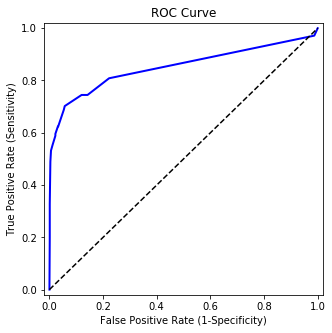

In [48]:
X_test = X_test_processed

test_pred_probs = tree.predict_proba(X_test)[:,1]
test_fpr, test_tpr, test_thresholds = metrics.roc_curve(y_test, test_pred_probs)

plt.figure(figsize=(5,5))
plot_roc(test_fpr, test_tpr)
plt.show()

The area under the curve is lower than the plot for the training set. This is expected since we cannot have the AUC score as high as when we train the data.

Now we want to take a look at the AUC score.

In [49]:
metrics.roc_auc_score(y_test, test_pred_probs)

0.851691311850329

The decision tree with max_depth = 5 returns quite a high AUC score on the test. This could be a promissing model to tune.

**K-Nearest-Neighbor**

Next, we will try to fit the model with KNN.

In [79]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

We can also obtain the predicted probabilities of each class for the first two test points.

In [52]:
knn.predict_proba(X_test[:2])

array([[1. , 0. ],
       [0.6, 0.4]])

In turn, this means that the classed predicted by KNN are:

In [53]:
knn.predict(X_test[:2])

array([0, 0], dtype=int64)

Now we want to plot the ROC curve for the test data.

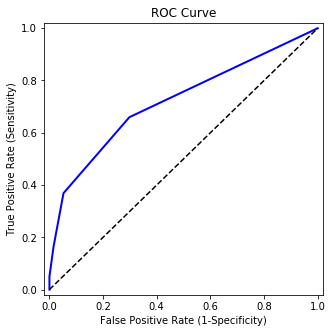

In [54]:
knn_probs = knn.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, knn_probs)
plt.figure(figsize=(5,5))
plot_roc(fpr, tpr)

It is clear that the area under the curve is much smaller compared to decision tree. We will see its exact AUC score below.

In [55]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, knn_probs)

0.7203122548898191

Thus, the AUC score for KNN with k=5 by default is much lower than the AUC score for Decision Tree (0.85).

**Logistic Regression**

First, we will try to fit logistics regression without regularization.

In [66]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(penalty='none', solver='saga', max_iter=10000, random_state=1)
lr_model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='warn', n_jobs=None, penalty='none',
                   random_state=1, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

We can obtain the predicted probabilities for the first five units in the training set.

In [67]:
lr_model.predict_proba(X_train[:5])

array([[0.75078141, 0.24921859],
       [0.96203885, 0.03796115],
       [0.74932641, 0.25067359],
       [0.74091838, 0.25908162],
       [0.9608356 , 0.0391644 ]])

In the first position we have the probability for "Class 0" and in the second position the probability for "Class 1". 

In [68]:
lr_model.classes_

array([0, 1], dtype=int64)

We want to evaluate its AUC score.

In [69]:
lr_prob = lr_model.predict_proba(X_test)[:,1]
roc_auc_score(y_test, lr_prob)

0.7734294371651022

We can see that the AUC score for logistic regression with no regulalization gives a higher score than KNN but lower score than decision tree.

Since regularization helps to tune the complexity of the model by adding a penalty term to the objective function to optimize, we will try to perform logistic regression with **ridge penalty**.

In [74]:
lr_rid = LogisticRegression(penalty="l2", solver='lbfgs', max_iter=1000, random_state=1)
lr_rid.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Then we eveluate the AUC score on the test set.

In [75]:
lr_rid_prob = lr_rid.predict_proba(X_test)[:,1]
roc_auc_score(y_test, lr_rid_prob)

0.7709195089127221

The AUC score for ridge regression does not realy improve as the model without regularization.

We now perform logistic regression model with **lasso penalty**.

In [77]:
lr_las = LogisticRegression(penalty="l1", solver='saga', max_iter=1000, random_state=1)
lr_las.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=1, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

And then evaluate its AUC score.

In [78]:
lr_las_prob = lr_las.predict_proba(X_test)[:,1]
roc_auc_score(y_test, lr_las_prob)

0.7708121764545612

As seen above, logistic regression does not give a really high AUC score with or without regularization. The score (0.77) is higher than the score for KNN (0.72) but smaller than the score for decision tree (0.85).

**Neutral Networks**

Now, we want to perform classification by training a neutral network. We will use the default values from `MLPClassifier`.

In [92]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(random_state=1)

model.fit(X_train, y_train)

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=1, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

We can see the predicted probabilities of the first five test units.

In [89]:
model.predict_proba(X_test[:5])

array([[9.94781262e-01, 5.21873797e-03],
       [4.44089210e-16, 1.00000000e+00],
       [9.98786777e-01, 1.21322288e-03],
       [4.71222915e-06, 9.99995288e-01],
       [9.95144621e-01, 4.85537907e-03]])

And their predicted classes.

In [90]:
model.predict(X_test[:5])

array([0, 1, 0, 1, 0], dtype=int64)

Finally we calculate the AUC score.

In [93]:
model_prob = model.predict_proba(X_test)[:,1]
roc_auc_score(y_test, model_prob)

0.8823636258555635

The AUC score of Neural Networks with all the default values is the highest from the one we have seen so far. Thus, it can be one of the promissing models we want to tune.

**Random Forest**

We are going to classify our dataset using Random Forest.

In [94]:
from sklearn.ensemble import RandomForestClassifier 
rfc = RandomForestClassifier(random_state=1)
rfc.fit(X_train, y_train)

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

Then, we can retrieve the feature importance.

In [95]:
rfc.feature_importances_

array([0.02624457, 0.00846238, 0.08878262, 0.02330441, 0.03931711,
       0.03647434, 0.13304158, 0.02740029, 0.13322774, 0.06345206,
       0.02500351, 0.06584594, 0.04270552, 0.02879401, 0.03488934,
       0.04237715, 0.04170198, 0.03306418, 0.10591127])

In [101]:
X_train.columns

Index(['state', 'area_code', 'international_plan', 'voice_mail_plan',
       'account_length', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls'],
      dtype='object')

This is telling us that the most important features of the model are `total_day_minutes` and `total_day_charge`. On the other hand, the least important feature is `area_code`.

Now we are eveluating its AUC score.

In [102]:
rfc_prob = rfc.predict_proba(X_test)[:,1]
roc_auc_score(y_test, rfc_prob)

0.8709574880902253

The AUC score for Random Forest is 0.87, which is comparatively as high as the score we have for Neutral Networks. This is considered as a promissing model.

**AdaBoost**

We will try to predict the classes using AdaBoost with the default values.

In [103]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(random_state=1)
ada.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=1)

Next, we can check the feature importance according to AdaBoost.

In [104]:
ada.feature_importances_

array([0.02, 0.  , 0.04, 0.02, 0.06, 0.04, 0.16, 0.04, 0.06, 0.06, 0.02,
       0.12, 0.06, 0.08, 0.02, 0.04, 0.06, 0.04, 0.06])

In this case, the biggest contribution is given by feature `total_day_minutes`, followed by `total_eve_charge`.

Finally, we will evaluate its AUC score.

In [105]:
ada_prob = ada.predict_proba(X_test)[:,1]
roc_auc_score(y_test, ada_prob)

0.8040811103129979

The AUC score for this model is quite low compared to other models we have seen.

**Conclusion**

We have tried many different models: Decision Tree, K-Nearest-Neighbor, Logistic Regression, Neutral Networks, Random Forest, AdaBoost. Among all the above models, we find that Neutral Networks and Random Forest are the most promissing models. Thus, we will continue to tune the algorithms in the next step with Neural Networks and Random Forest.

The hyperparameters to tune are:
* For Neural Network: the number of neurons in the hidden layer `hidden_layer_sizes`, the learning rate `learning_rate_init`, the optimal iterations to stop `n_iter_no_change`, the type of optimizer `solver`.
* For Random Forest: the number of iterations `n_estimators`, the number of features to perform the splits `max_features`.

#### c. Model Selection Method

Model tuning is the process of finding the best machine learning model hyperparameters for a particular data set. Random Search and Grid Search are two uniformed methods for hyperparameter tuning and Scikit Learn offers these functions through `GridSearchCV` and `RandomizedSearchCV`. Both provide an automatical way to tune the hyperparameters and an easier way to work with when we have many model parameters and pipelines. They also gives the possibility to inspect the results within each models, and for each hyperparameter value. Moreover, for large datasets tuning with cross-validation is not ideal since the operation will involve a large computational cost.

Given the large number of hyperparameters that need to be optimized as stated in the section above, we will use Random Search instead of Grid Search. The reason is that Grid Search takes more time and resources when it comes to dimensionality since the number of hyperparameters to evaluate grows exponentially. Moreover, if the optimal parameter is not found since we do not have it in our grid, more time is spent to find the near best solution until it reaches the last set sample. 

Thus, we will use **Random Search** to tune the hyperparameters in the next part. Together with the model tuning method, we will use the scoring `auc_roc` from the metrics library (as stated in the Problem Framing part).

### 4. Results

**Tuning the best models**

In this section, we will continue with the promissing models as stated in the previous part. We will try to tune each model hyperparameters using Random Search such that it returns the best AUC score on cross validation of the training data.


* **Neural Networks** 

We will first initialize the random grid.

In [124]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    "hidden_layer_sizes": [i for i in range(1, 20)],
    "learning_rate_init": reciprocal(1e-4, 9e-1),
    "n_iter_no_change": [50, 100, 500, 1000, 2000],
    "solver" : ["sgd", "adam"]
}

Now we will run RandomizedSearchCV with AUC scoring. For the search, we are going to perform cross-validation with 4-fold CV, 10 iterations and the maximum number of epochs for the neural network is set equal to 10000.

In [127]:
nn_search = RandomizedSearchCV(MLPClassifier(max_iter=10000, random_state=1), 
                               param_distribs, scoring='roc_auc', n_iter=10, cv=4, 
                               n_jobs=-1, iid=False, random_state=1, verbose=1)
nn_search.fit(X_train, y_train)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  3.6min finished


RandomizedSearchCV(cv=4, error_score='raise-deprecating',
                   estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                           batch_size='auto', beta_1=0.9,
                                           beta_2=0.999, early_stopping=False,
                                           epsilon=1e-08,
                                           hidden_layer_sizes=(100,),
                                           learning_rate='constant',
                                           learning_rate_init=0.001,
                                           max_iter=10000, momentum=0.9,
                                           n_iter_no_change=10,
                                           nesterovs_momentum=True, power_t=0.5,
                                           ra...
                   param_distributions={'hidden_layer_sizes': [1, 2, 3, 4, 5, 6,
                                                               7, 8, 9, 10, 11,
                   

The best set of hyperparameters is:

In [128]:
nn_search.best_params_

{'hidden_layer_sizes': 8,
 'learning_rate_init': 0.0017352226533547332,
 'n_iter_no_change': 100,
 'solver': 'adam'}

This produces the CV accuracy:

In [129]:
nn_search.best_score_

0.8865246550418588

* **Random Forest** 

We will perform Random Search with AUC scoring, 10-fold cross-validation and 50 iterations.

In [131]:
search_grid = {
    'n_estimators': [50, 100, 500, 1000],
    'max_features': [2, 3, "sqrt"]
}

rf_search = RandomizedSearchCV(RandomForestClassifier(random_state=1), search_grid, scoring='roc_auc',
                                   n_iter=50, cv=10, n_jobs=-1, iid=False, random_state=1, verbose=1)
rf_search.fit(X_train, y_train)

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:266: UserWarning: The total space of parameters 12 is smaller than n_iter=50. Running 12 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 10 folds for each of 12 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   18.4s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:  1.3min finished


RandomizedSearchCV(cv=10, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=Non

The best set of hyperparameters is:

In [132]:
rf_search.best_params_

{'n_estimators': 100, 'max_features': 3}

The best model randomly selects 3 features at each split and this forest is composed of 100 trees.

This produces the CV accuracy:

In [133]:
rf_search.best_score_

0.9092113387832589

We can check the feature importance of the best Random Forest model.

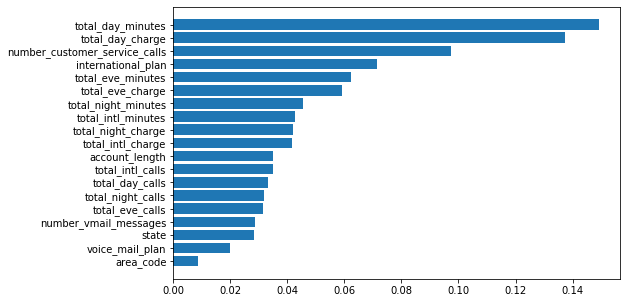

In [137]:
importances = rf_search.best_estimator_.feature_importances_
ind_sort = np.argsort(importances)

plt.figure(figsize=(8,5))
plt.barh(np.arange(1, X_train.shape[1]+1, 1), importances[ind_sort])
plt.yticks(np.arange(1, X_train.shape[1]+1, 1), labels=X_train.columns[list(ind_sort)])
plt.title('Feature Importance of the best Random Forest model')
plt.show()

We can see that the most important features are `total_day_minutes` and `total_day_charge`, followed by `number_customer_service_calls`. On the other hand, the least important feature is `area_code`.

**Plotting the results on the traning data**

We will plot the ROC curve for the best two models on the training data.

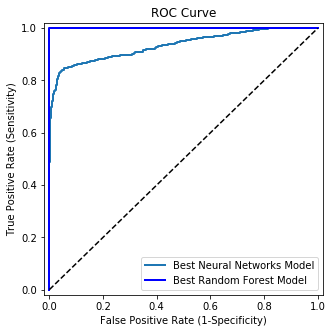

In [146]:
nn_pr = nn_search.best_estimator_.predict_proba(X_train)[:,1]
rf_pr = rf_search.best_estimator_.predict_proba(X_train)[:,1]

fpr_nn, tpr_nn, thresholds = roc_curve(y_train, nn_pr)
fpr_rf, tpr_rf, thresholds = roc_curve(y_train, rf_pr)

plt.figure(figsize=(5,5))
plt.plot(fpr_nn, tpr_nn, linewidth=2, label='Best Neural Networks Model')
plot_roc(fpr_rf, tpr_rf, label='Best Random Forest Model')
plt.legend()
plt.show()

As seen above, the curve for the Random Forest reaches the maximum AUC score equal to 1 for the training dataset. This might be because the tree has grown until maximum possible depth when all leaves are pure. Thus, this perfectly fits the training set but it can perform worse on the testing dataset due to the ability to generalize.

### 5. Application to the test dataset

We will evaluate the results of the best models on the test data.

First, we will assess the AUC accuracy on the test set of the best Neural Networks model found by RandomizedSearch.

In [140]:
nn_prob = nn_search.best_estimator_.predict_proba(X_test)[:,1]
roc_auc_score(y_test, nn_prob)

0.8671059041108332

This AUC score is approximately 0.87 on the test data, which is quite high.

Then, we will calculate the AUC score for the best Random Forest model.

In [141]:
rf_prob = rf_search.best_estimator_.predict_proba(X_test)[:,1]
roc_auc_score(y_test, rf_prob)

0.8760433953384686

The AUC score of the best Random Forest model is approximately 0.88, which is a little higher than the score of the best Neural Networks model.

Besides, we can improve the result by increasing the number of Randomized Search iterations and expanding the hyperparameter grid to find a better ensembled model.

Finally, we will plot the ROC curve for the best two models on the test data.

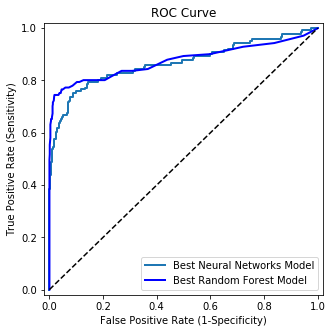

In [144]:
fpr1, tpr1, thresholds = roc_curve(y_test, nn_prob)
fpr2, tpr2, thresholds = roc_curve(y_test, rf_prob)

plt.figure(figsize=(5,5))
plt.plot(fpr1, tpr1, linewidth=2, label='Best Neural Networks Model')
plot_roc(fpr2, tpr2, label='Best Random Forest Model')
plt.legend()
plt.show()

We can see that the two models nearly present the same curve, with Random Forest having a little larger area. Compared the ROC Curve for the training and testing data, we can see that Random Forest tends to overfit the training data while Neural Network performs a more stable outcome accuracy. Thus, we cannot conclude that any model performs better than the other. However, for this dataset, Random Forest performs a little better than Neutral Networks.